# Relax Inc. Take-Home Challenge

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_eng = pd.read_csv('takehome_user_engagement.csv', encoding='ISO-8859-1')
df_users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

In [3]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])

# Merge]ing the two datasets on user ID (object_id in users, user_id in engagement)
df_merged = pd.merge(df_users, df_eng, left_on='object_id', right_on='user_id', how='left')
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0


In [6]:
# Checking for missing values
df_merged.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                     3177
user_id                        3177
visited                        3177
dtype: int64

In [7]:
df_merged_clean = df_merged.dropna(subset=['time_stamp'])

In [8]:
df_merged['time_stamp'] = pd.to_datetime(df_merged['time_stamp'], errors='coerce')  # Ensure it's in datetime format
df_merged['time_stamp'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Optional: Fill with a default date

df_merged['user_id'].fillna(0, inplace=True)  # Replace missing user_id with 0
df_merged['visited'].fillna(0, inplace=True)  # Replace missing 'visited' with 0

In [9]:
missing_engagement_users = df_merged[df_merged['time_stamp'].isnull()]
print(missing_engagement_users.shape)

(0, 13)


In [10]:
df_merged.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                        0
user_id                           0
visited                           0
dtype: int64

In [11]:
# To Fill with a default date (e.g., date of user creation if known)
df_merged['last_session_creation_time'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Example default date

# Option 2: Fill with NaT for clarity
#df_merged['last_session_creation_time'] = df_merged['last_session_creation_time'].fillna(pd.NaT)


/var/folders/08/bklv4sgx7wnfq2sn9wk1r9sw0000gn/T/ipykernel_20514/2714186376.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged['last_session_creation_time'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Example default date


In [12]:
df_merged.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                        0
user_id                           0
visited                           0
dtype: int64

In [13]:
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.0,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0


In [14]:
# Convert last_session_creation_time to datetime format (already converted above)
df_merged['last_session_creation_time'] = pd.to_datetime(df_merged['last_session_creation_time'], errors='coerce')

# Check for any datetime conversion issues
df_merged.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                    datetime64[ns]
user_id                              float64
visited                              float64
dtype: object

In [15]:
# Sort the data
df_eng_sorted = df_eng.sort_values(by=['user_id', 'time_stamp'])

# Set the index to time_stamp
df_eng_sorted.set_index('time_stamp', inplace=True)

# Calculate the rolling count of distinct login days in a 7-day window
df_eng_sorted['7day_rolling'] = df_eng_sorted.groupby('user_id')['visited'].rolling('7D').count().reset_index(level=0, drop=True)

# Identify users who logged in 3 times in any 7-day window
adopted_users = df_eng_sorted[df_eng_sorted['7day_rolling'] >= 3]['user_id'].unique()

In [16]:
adopted_users

array([    2,    10,    20, ..., 11969, 11975, 11988])

In [17]:
# Flag adopted users in the merged dataset
df_merged['adopted_user'] = df_merged['object_id'].isin(adopted_users).astype(int)

In [18]:
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0,1


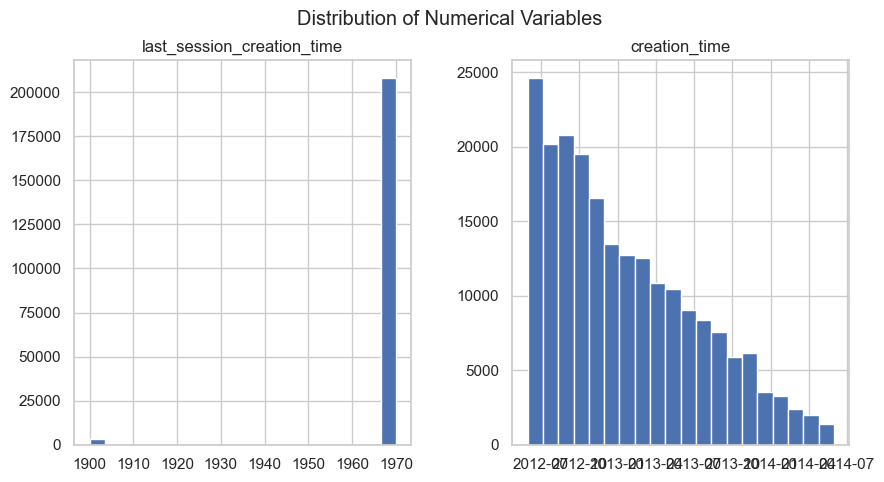

In [19]:
sns.set(style='whitegrid')

# Histogram for numerical variables
numerical_columns = ['last_session_creation_time', 'creation_time']  # Add more numerical columns as necessary
df_merged[numerical_columns].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

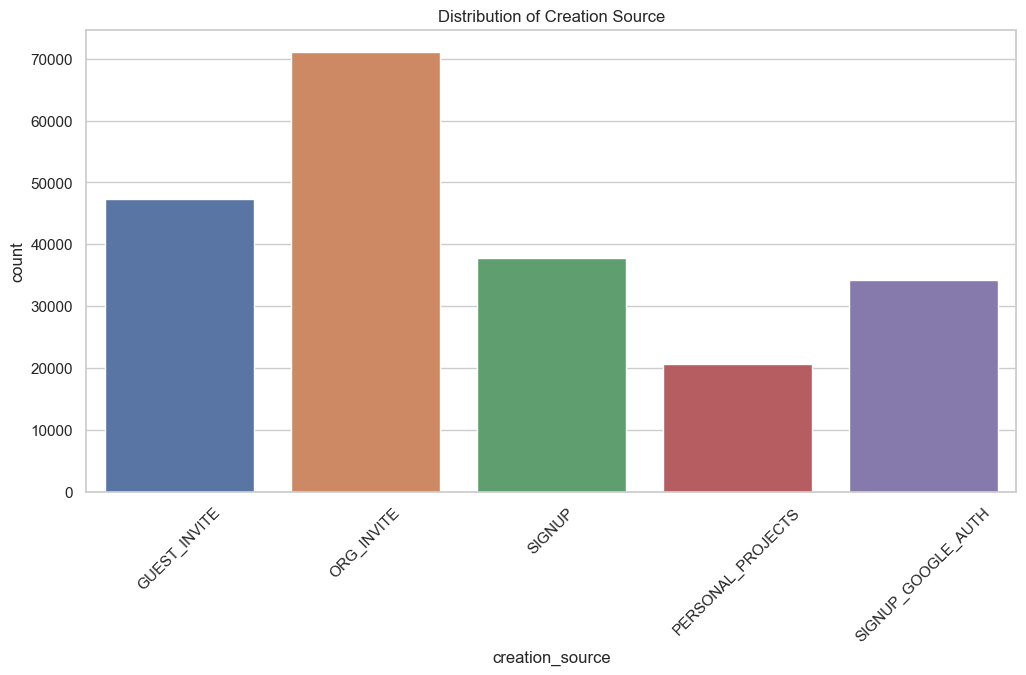

In [20]:
# Countplot for creation_source
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged, x='creation_source')
plt.title('Distribution of Creation Source')
plt.xticks(rotation=45)
plt.show()


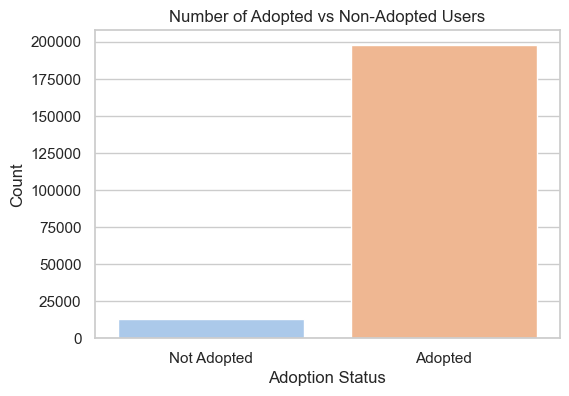

In [26]:

sns.set(style='whitegrid')

# Count plot for adoption status
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='adopted_user', palette='pastel')
plt.title('Number of Adopted vs Non-Adopted Users')
plt.xticks([0, 1], ['Not Adopted', 'Adopted'])
plt.xlabel('Adoption Status')
plt.ylabel('Count')
plt.show()


In [30]:
# Convert necessary columns to string
df_merged['creation_source'] = df_merged['creation_source'].astype(str)
df_merged['adopted_user'] = df_merged['adopted_user'].astype(str)

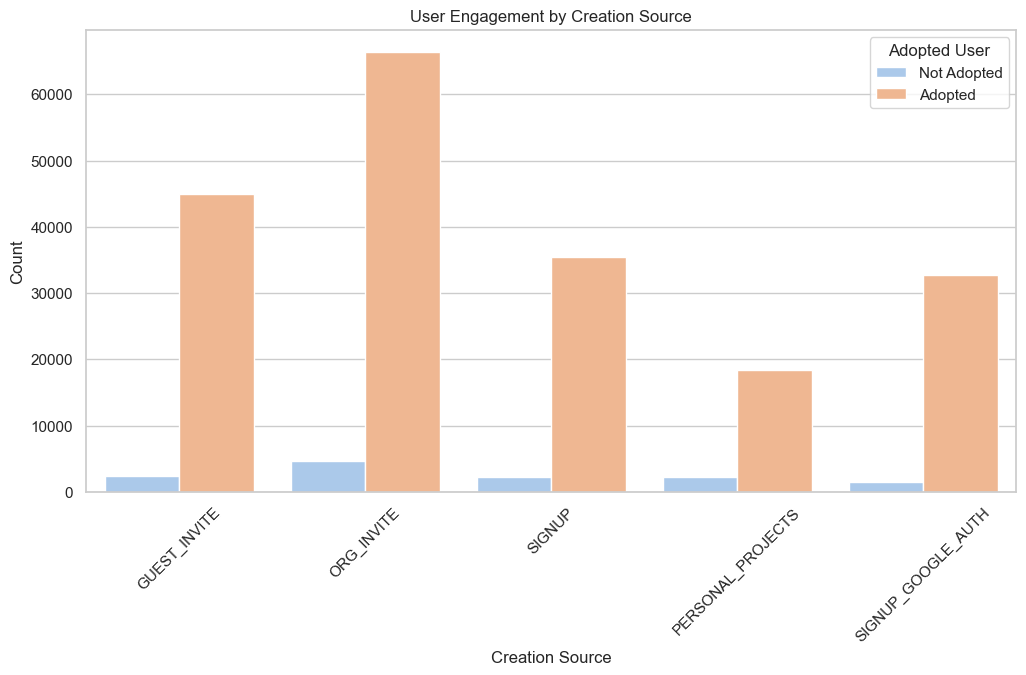

In [31]:
# Count plot for creation source and adoption status
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged, x='creation_source', hue='adopted_user', palette='pastel')
plt.title('User Engagement by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.legend(title='Adopted User', loc='upper right', labels=['Not Adopted', 'Adopted'])
plt.show()


# Modelling

### Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# Define features and target
features = df_merged[['visited', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
target = df_merged['adopted_user']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

### Model Selection

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)


### Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

for name, model in models.items():
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)  # Ensure predictions are integers
    
    # Calculate probabilities for ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Ensure the target is binary
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}\n")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.98
ROC AUC: 0.63

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      2635
           1       0.95      1.00      0.98     39584

    accuracy                           0.95     42219
   macro avg       0.98      0.63      0.69     42219
weighted avg       0.96      0.95      0.94     42219

Model: Random Forest
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.98
ROC AUC: 0.63

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      2635
           1       0.95      1.00      0.98     39584

    accuracy                           0.95     42219
   macro avg       0.98      0.63      0.69     42219
weighted avg       0.96      0.95      0.94     42219

Model: Gradient Boosting
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.98
ROC AUC: 0.63

              precision    recall  f1-score   suppo

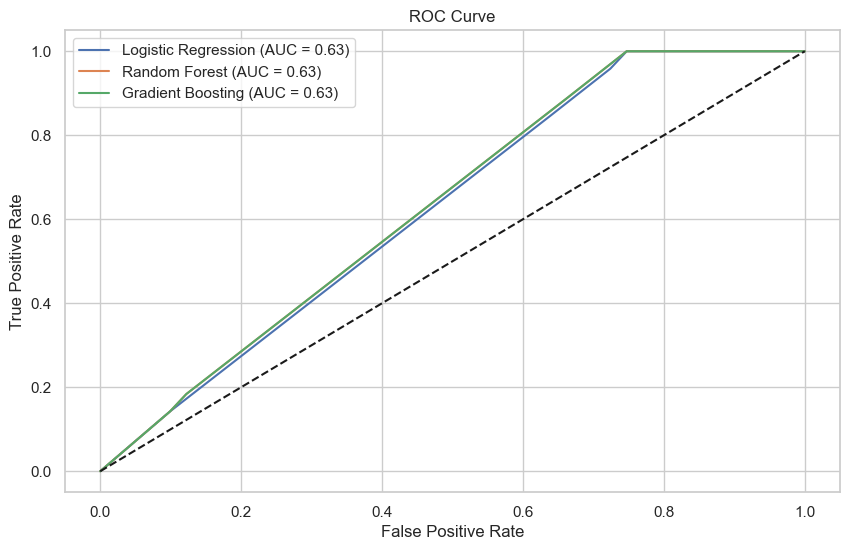

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_scores):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Feature Important Analysis

### Logistic Regression

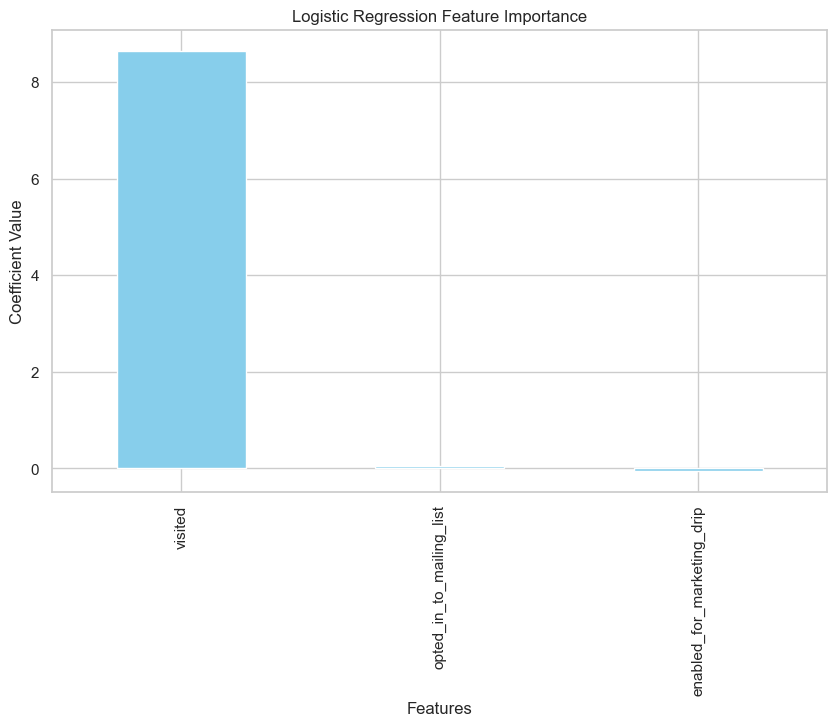

In [48]:
log_reg_coef = models['Logistic Regression'].coef_[0]
feature_importance_lr = pd.Series(log_reg_coef, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importance_lr.plot(kind='bar', color='skyblue')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


### Random Forest

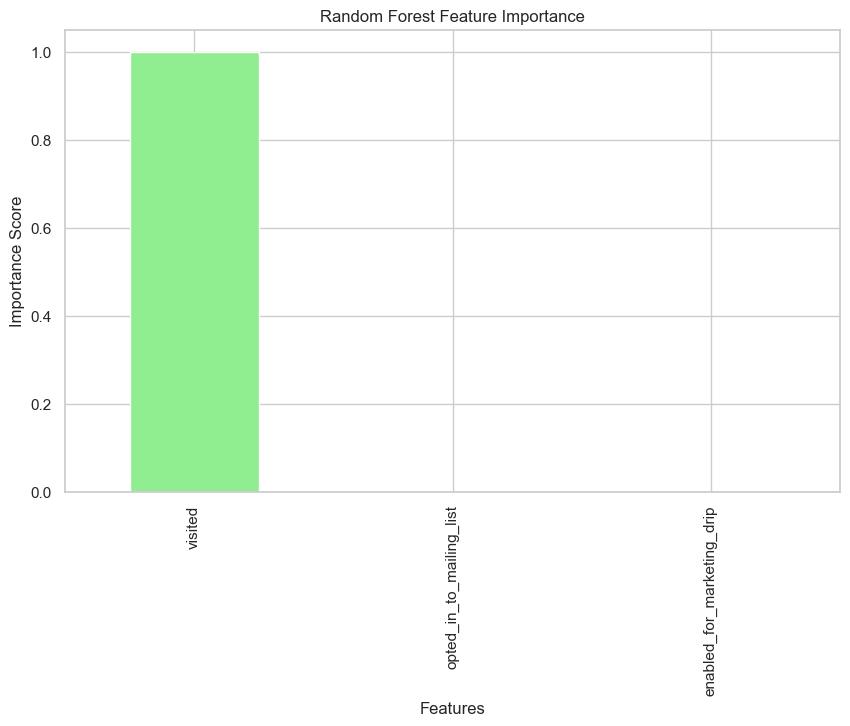

In [49]:
# Random Forest
feature_importance_rf = models['Random Forest'].feature_importances_
feature_importance_rf = pd.Series(feature_importance_rf, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar', color='lightgreen')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

### Gradient Boosting

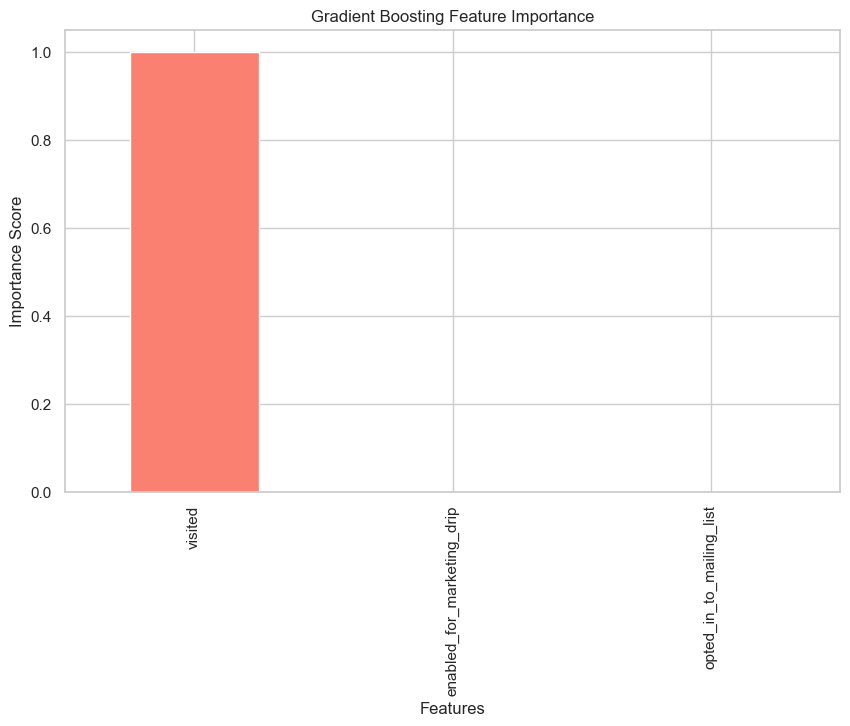

In [50]:
feature_importance_gb = models['Gradient Boosting'].feature_importances_
feature_importance_gb = pd.Series(feature_importance_gb, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importance_gb.plot(kind='bar', color='salmon')
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [51]:
# Create a summary DataFrame
importance_summary = pd.DataFrame({
    'Feature': X_train.columns,
    'Logistic Regression': feature_importance_lr.values,
    'Random Forest': feature_importance_rf.values,
    'Gradient Boosting': feature_importance_gb.values
})

# Set the index to 'Feature'
importance_summary.set_index('Feature', inplace=True)

# Sort values based on Random Forest importance (or any model of your choice)
importance_summary = importance_summary.sort_values(by='Random Forest', ascending=False)

# Display the summary DataFrame
print(importance_summary)


                            Logistic Regression  Random Forest  \
Feature                                                          
visited                                8.647976       0.999745   
opted_in_to_mailing_list               0.045973       0.000157   
enabled_for_marketing_drip            -0.049939       0.000098   

                            Gradient Boosting  
Feature                                        
visited                              0.999809  
opted_in_to_mailing_list             0.000165  
enabled_for_marketing_drip           0.000025  


In [52]:
# Define a threshold for high importance (this can be adjusted)
threshold = 0.05

# Identify features that are important across all models
common_features = importance_summary[
    (importance_summary['Logistic Regression'] > threshold) &
    (importance_summary['Random Forest'] > threshold) &
    (importance_summary['Gradient Boosting'] > threshold)
]

print("Common Features with High Importance Across Models:")
print(common_features)


Common Features with High Importance Across Models:
         Logistic Regression  Random Forest  Gradient Boosting
Feature                                                       
visited             8.647976       0.999745           0.999809


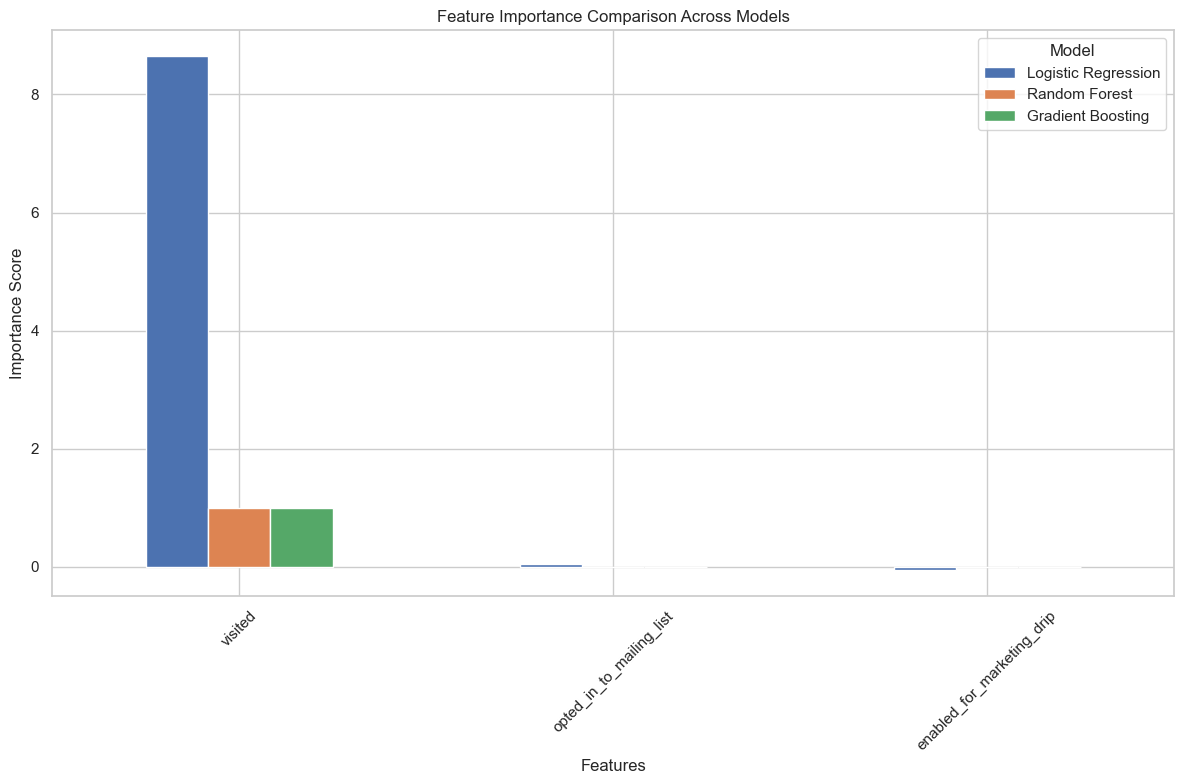

In [53]:
# Plotting Feature Importance Comparison
importance_summary.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importance Comparison Across Models')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()
